# Import libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as offline
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import dash
from dash import html, dcc, Input, Output, State

# Import data

In [74]:
# Load the dataset
real_estate_data = pd.read_csv("0. Projects/2/projectII_alvaroG-GuillermoH/data/Real_Estate.csv")

# Display the first few rows of the dataset and the info about the dataset
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [77]:
mask_zero = real_estate_data["House price of unit area"]==0
mask_almostzero_exc = (real_estate_data["House price of unit area"]!=0) & (real_estate_data["House price of unit area"]<1)
mask_almostzero = real_estate_data["House price of unit area"]<10

real_estate_data_zero = real_estate_data[mask_zero]
real_estate_data_almostzero_exc = real_estate_data[mask_almostzero_exc]
real_estate_data_almostzero = real_estate_data[mask_almostzero]

real_estate_data_zero.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
17,2012-09-12 06:54:06.555817,10.3,4079.418,0,24.960290,121.548225,0.0
25,2012-09-20 13:50:20.328592,16.1,3771.895,9,24.970786,121.545295,0.0
49,2012-10-10 12:36:22.455568,13.5,2175.030,0,24.985829,121.495321,0.0
57,2012-10-15 07:23:33.287274,24.2,3078.176,5,24.936812,121.482352,0.0
63,2012-10-19 04:22:09.096118,38.2,4082.015,1,24.996387,121.477832,0.0


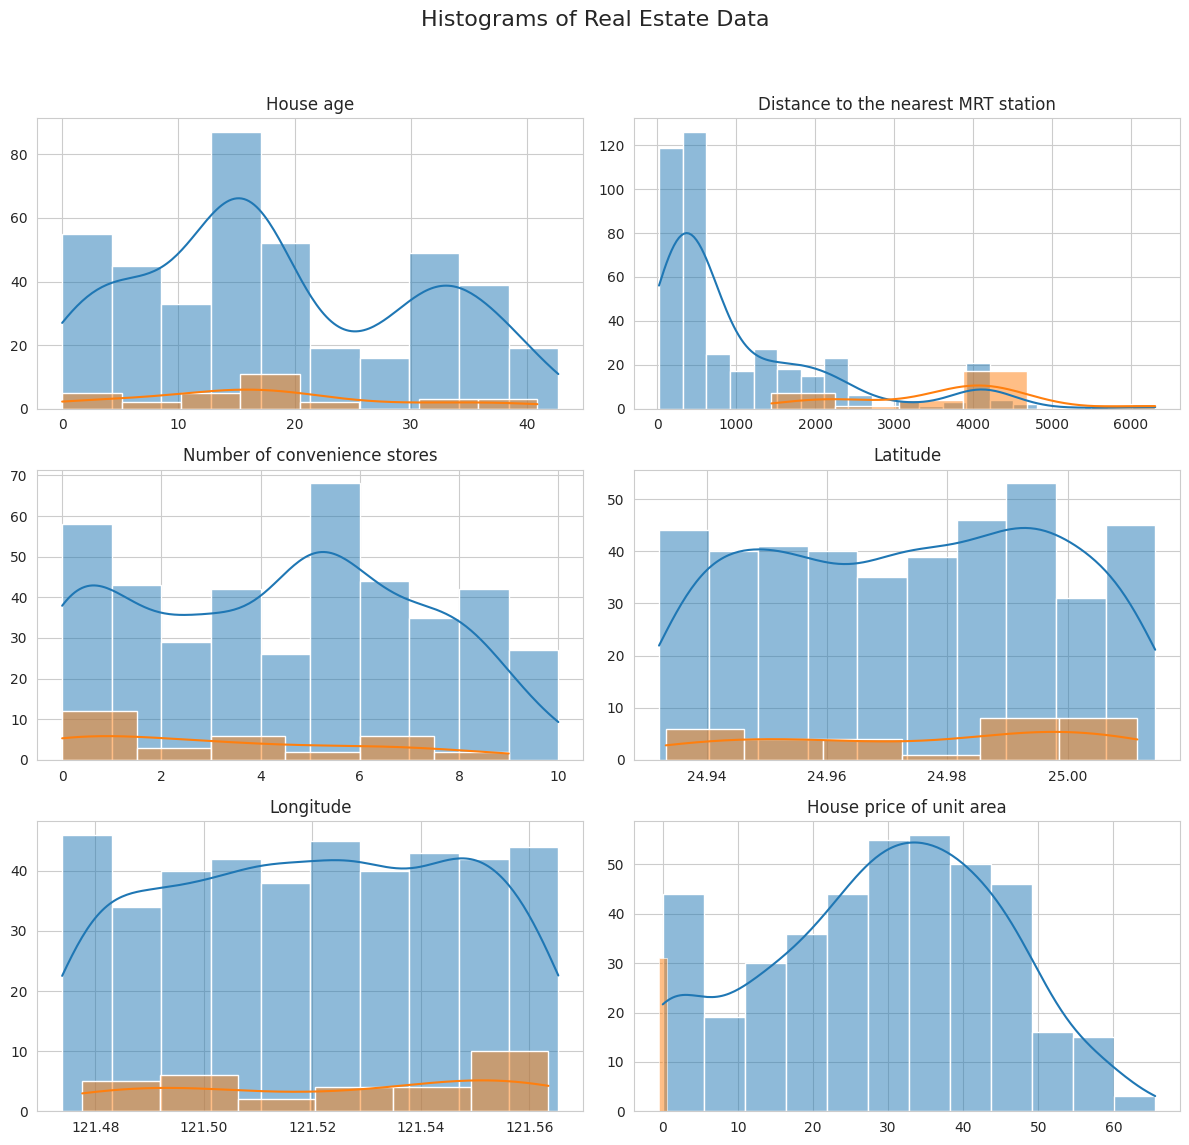

In [83]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    sns.histplot(real_estate_data_zero[col], kde=True, ax=axes[i//2, i%2])
    # sns.histplot(real_estate_data_almostzero[col], kde=True, ax=axes[i//2, i%2])
    # sns.histplot(real_estate_data_almostzero_exc[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

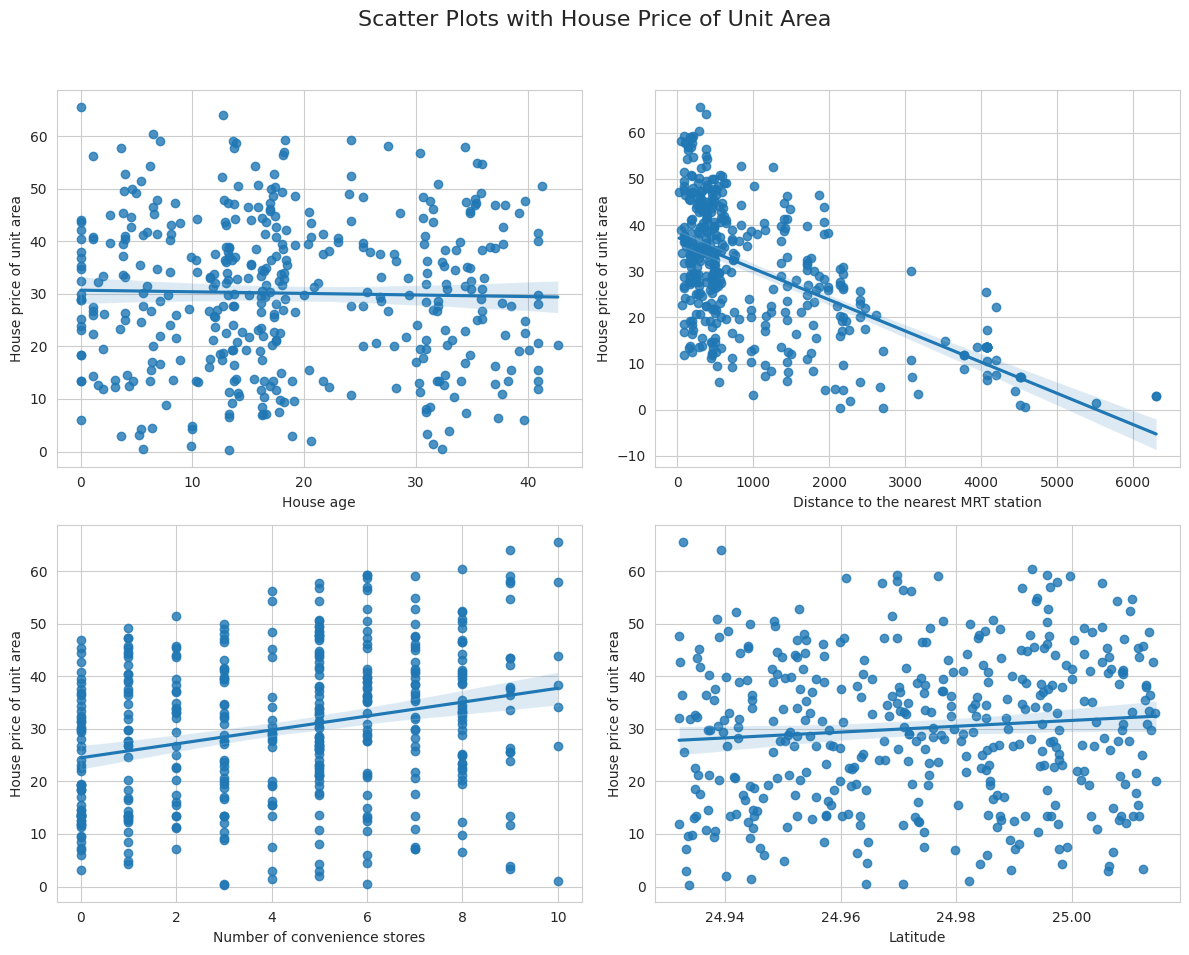

In [70]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.regplot(data=imputed_df, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.regplot(data=imputed_df, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.regplot(data=imputed_df, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.regplot(data=imputed_df, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
fig = px.scatter_mapbox(real_estate_data_zero, 
                        lat="Latitude", 
                        lon="Longitude", 
                        #hover_name="Address", 
                        #hover_data=["Address", "Listed"],

                        # color="Distance to the nearest MRT station",
                        # color="House age",
                        color="House price of unit area",
                        # color="Number of convenience stores",

                        # color_continuous_scale='viridis',
                        size="House age",
                        zoom=10, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [13]:
fig = px.scatter_3d(real_estate_data,x="Longitude", y="Latitude", z="House age", color="House price of unit area", hover_data = ["House price of unit area"],
                         color_continuous_scale = "rainbow")

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

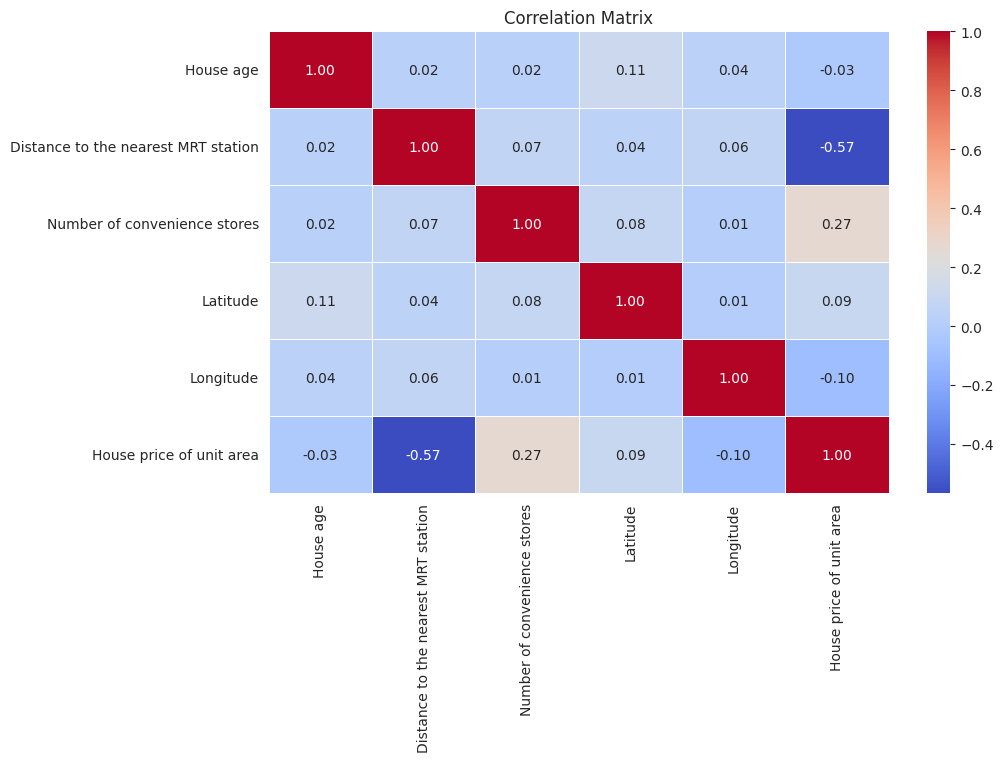

In [71]:
# Correlation matrix
correlation_matrix = imputed_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [72]:
# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = imputed_df[features]
y = imputed_df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

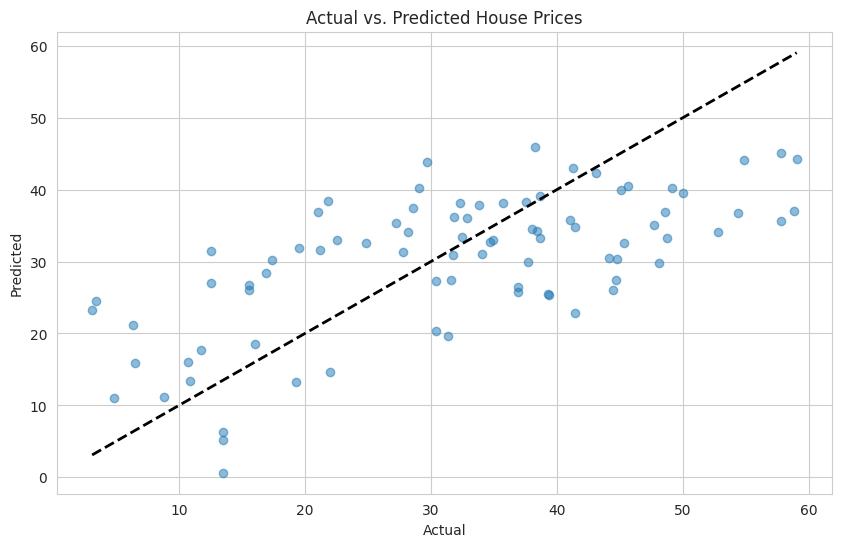

In [73]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [68]:
# Use knn 
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer


# real_estate_data[real_estate_data["House price of unit area"]==0]["House price of unit area"] = pd.NA
# real_estate_data[real_estate_data["House price of unit area"]==0].replace(0, np.nan)
real_estate_data["House price of unit area"].replace(0, np.nan, inplace = True)


cols = real_estate_data.select_dtypes(include=[np.number, "float"]).columns.to_list()

sel_data = real_estate_data[cols]
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(sel_data)
imputed_df = pd.DataFrame(imputed_data, columns=cols)

imputed_df[15:]

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
15,4.9,639.61980,8.0,24.975469,121.476564,49.157054
16,3.1,1360.13900,5.0,24.957540,121.550592,13.673532
17,10.3,4079.41800,0.0,24.960290,121.548225,13.498924
18,1.1,143.83830,4.0,24.972158,121.477006,56.251355
19,13.7,193.58450,1.0,24.943551,121.515410,16.444017
...,...,...,...,...,...,...
409,18.3,170.12890,6.0,24.981186,121.486798,29.096310
410,11.9,323.69120,2.0,24.950070,121.483918,33.871347
411,0.0,451.64190,8.0,24.963901,121.543387,25.255105
412,35.9,292.99780,5.0,24.997863,121.558286,25.285620


In [63]:
# real_estate_data[real_estate_data["House price of unit area"]==0]
real_estate_data["House price of unit area"].replace(0, np.nan, inplace = True)

real_estate_data[16:]

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
16,2012-09-12 05:03:03.332710,3.1,1360.13900,5,24.957540,121.550592,13.673532
17,2012-09-12 06:54:06.555817,10.3,4079.41800,0,24.960290,121.548225,NaN
18,2012-09-12 23:27:33.301004,1.1,143.83830,4,24.972158,121.477006,56.251355
19,2012-09-14 06:14:19.030272,13.7,193.58450,1,24.943551,121.515410,16.444017
20,2012-09-16 01:53:06.000222,8.4,330.08540,6,24.960582,121.497347,47.355551
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [67]:
real_estate_data = pd.read_csv("0. Projects/2/projectII_alvaroG-GuillermoH/data/Real_Estate.csv")

real_estate_data[real_estate_data["House price of unit area"]==0]

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
17,2012-09-12 06:54:06.555817,10.3,4079.418,0,24.960290,121.548225,0.0
25,2012-09-20 13:50:20.328592,16.1,3771.895,9,24.970786,121.545295,0.0
49,2012-10-10 12:36:22.455568,13.5,2175.030,0,24.985829,121.495321,0.0
57,2012-10-15 07:23:33.287274,24.2,3078.176,5,24.936812,121.482352,0.0
63,2012-10-19 04:22:09.096118,38.2,4082.015,1,24.996387,121.477832,0.0
68,2012-10-24 10:01:12.581872,18.9,6306.153,5,25.006182,121.560529,0.0
81,2012-11-02 13:03:49.453579,16.3,4510.359,7,24.933290,121.494506,0.0
97,2012-11-16 08:44:19.839765,0.0,4066.587,6,24.963296,121.560482,0.0
200,2013-02-02 17:54:15.261898,34.0,4082.015,2,24.991962,121.522618,0.0
203,2013-02-05 03:27:08.014369,37.7,4197.349,7,25.004411,121.561228,0.0
